---
title: "Convergence: Solow Model"
author: "Pablo Winant"
format:
    html: default
    ipynb: default
---

### Solow Model

A representative agent uses capital $k_t$ to produce $y_t$ using the following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what remains:

$$i_t = y_t - c_t$$ 

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount factor.

For now, we ignore the objective and assume that the saving rate $s=\frac{i_t}{y_t}$ is constant over time.

In [1]:
# how to store the model's information?

In [2]:
# solution 1: variables zoo
α = 0.3
β = 0.9


0.9

In [ ]:
# solution 2: list
m = [0.3, 0.9]

In [7]:
# solution 2.b: tuple
m = (0.3, 0.9)

(0.3, 0.9)

In [6]:
# solution 3: dictionary

# a dictionary is a list of pairs
:a => 2 # a pair associating symbol :a to 2b
"a" => 2 # can be done with a string (but slower)

# 

Dict(
    :α=>0.3,
    :β=>0.96
)


Dict{Symbol, Float64} with 2 entries:
  :α => 0.3
  :β => 0.96

In [12]:
# solution 4: define your own type
struct MyOwnType
    α::Float64 # fields
    β::Float64 #
    # γ::Float64
end
# problem with types: not easy to modify after first definition

In [10]:
mymodel = MyOwnType(0.3, 0.96)
mymodel.α

0.3

In [18]:
# solution 5: namedtuples

model = (; α=0.3, β=0.96 ) # after semi-colon: named arguments

(α = 0.3, β = 0.96)

In [19]:
# behaves like a tuple:
model[1]

0.3

In [20]:
# behaves like a structure:
model.α

0.3

In [21]:
# is associated to a unique type (so very fast)
typeof(model)

@NamedTuple{α::Float64, β::Float64}

__Create a `NamedTuple` to hold parameter values $\beta=0.96$, $\delta=0.1$, $\alpha=0.3$, $\gamma=4$.__ 

In [29]:
# 🦁
model = (; α=0.3, β=0.96, γ=4.0, δ=0.1 ) # after semi-colon: named arguments

(α = 0.3, β = 0.96, γ = 4.0, δ = 0.1)

In [26]:
# to update model (returns a new model)
model2 = merge(model, (;γ=2.0, ϵ=0.001))
model2

(α = 0.3, β = 0.96, γ = 2.0, δ = 0.1, ϵ = 0.001)

In [27]:
model

(α = 0.3, β = 0.96, γ = 4.0, δ = 0.1)

__Write down the formula of function $f$ such that $k_{t+1}$: $k_{t+1} = f(k_t)$.__

$$k_{t+1} = (1-\delta) k_t + s k_t^{\alpha}$$

__Define a function `f(k::Float64, p::NamedTuple)::Float64` to represent $f$ for a given calibration__

In [32]:
# extract δ, α from p

# solution 1
α = model.α
δ = model.δ

# solution 2: named arguments *unpacking*
(;α, δ) = model


(α = 0.3, β = 0.96, γ = 4.0, δ = 0.1)

In [34]:
# 🦁
function f(k, p; s=0.2)

    # extract δ, α from p

    (;α, δ) = p

    k1 = (1-δ)*k + s*k^α

    return k1
end

f (generic function with 1 method)

In [35]:
# 🦁
f(0.5, model)

0.6124504792712471

__Write a function `simulate(k0::Float64, T::Int, p::NamedTuple)::Vector{Float64}` to compute the simulation over `T` periods starting from initial capital level `k0`.__

In [40]:
# by default a vector can contain anything -> not efficient
[]

Any[]

In [41]:
# otherwise, the type if inferred from the content
[0.0]

1-element Vector{Float64}:
 0.0

In [42]:
# unless explicitly specified
Float64[]

Float64[]

In [47]:
# 🦁
function simulate(k0, T, p; s=0.2)
    # we add an option to specify the saving rate

    sim = [k0]
    for t = 1:T

        kt = sim[end]
        kn = f(kt,p; s=s)
        push!(sim, kn)

    end

    return sim

end

simulate (generic function with 1 method)

In [52]:
# 🦁
sim = simulate(0.5, 100, model; s=0.3)

101-element Vector{Float64}:
 0.5
 0.6936757189068706
 0.8931322483167848
 1.0938176799995427
 1.292616114625568
 1.4873672712967825
 1.6765760854980325
 1.8592250084513522
 2.0346465014986186
 2.2024331183825105
 ⋮
 4.796935178963784
 4.797428673633411
 4.797887638373357
 4.798314488292645
 4.798711469711076
 4.7990806719381895
 4.79942403823261
 4.799743375998478
 4.800040366271797

__Make a nice plot to illustrate the convergence. Do we get convergence from any initial level of capital?__

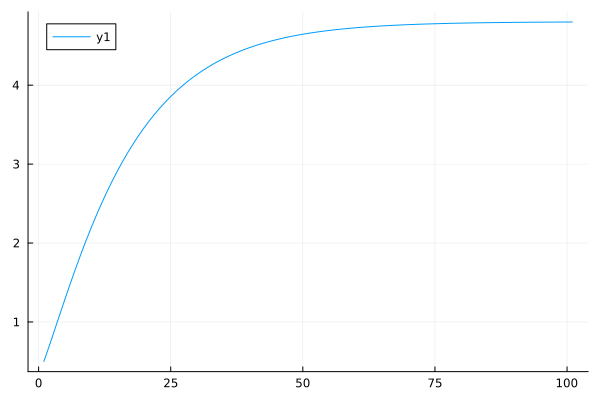

In [55]:
# 🦁
using Plots
plot(sim)

In [73]:
# 🦁

# compute growh rate 
growth(v) = v[2:end] ./ v[1:end-1] .- 1

growth (generic function with 1 method)

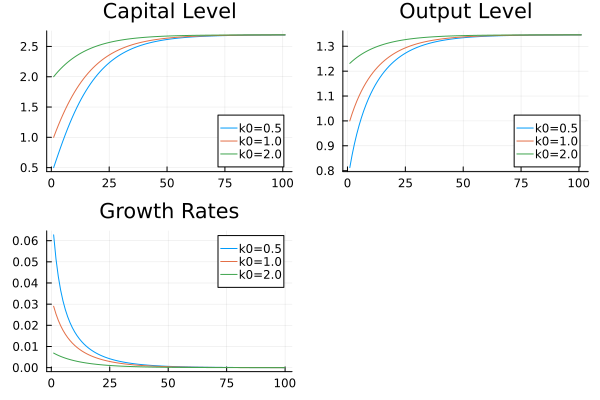

In [75]:
# 🦁

# compare different initial capital levels
sim0 = simulate(0.5, 100, model);
sim1 = simulate(1.0, 100, model);
sim2 = simulate(2.0, 100, model);

pl1 = plot(sim0, label="k0=0.5", title="Capital Level")
plot!(pl1, sim1, label="k0=1.0")
plot!(pl1, sim2, label="k0=2.0")

α = model.α
y0 = sim0.^α
y1 = sim1.^α
y2 = sim2.^α

pl2 = plot(y0, label="k0=0.5", title="Output Level")
plot!(pl2, y1, label="k0=1.0")
plot!(pl2, y2, label="k0=2.0")

pl3 = plot(growth(y0), label="k0=0.5", title="Growth Rates")
plot!(pl3, growth(y1), label="k0=1.0")
plot!(pl3, growth(y2), label="k0=2.0")

plot(pl1, pl2, pl3)
# plot([sim0, sim1, sim2])

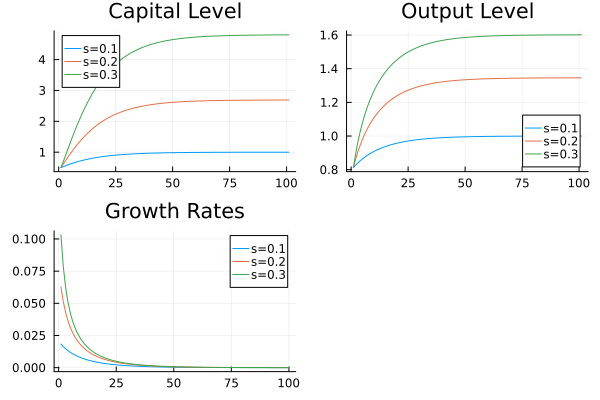

In [76]:

# compare different initial capital levels
sim0 = simulate(0.5, 100, model; s=0.1);
sim1 = simulate(0.5, 100, model; s=0.2);
sim2 = simulate(0.5, 100, model; s=0.3);

pl1 = plot(sim0, label="s=0.1", title="Capital Level")
plot!(pl1, sim1, label="s=0.2")
plot!(pl1, sim2, label="s=0.3")

α = model.α
y0 = sim0.^α
y1 = sim1.^α
y2 = sim2.^α

pl2 = plot(y0, label="s=0.1", title="Output Level")
plot!(pl2, y1, label="s=0.2")
plot!(pl2, y2, label="s=0.3")

pl3 = plot(growth(y0), label="s=0.1", title="Growth Rates")
plot!(pl3, growth(y1), label="s=0.2")
plot!(pl3, growth(y2), label="s=0.3")

plot(pl1, pl2, pl3)
# plot([sim0, sim1, sim2])

__Suppose you were interested in using `f` to compute the steady-state. What would you propose to measure convergence speed? To speed-up convergence? Implement these ideas.__

In [89]:
quick_dirty_steady_state(model; s=0.2) = simulate(1.0, 100, model; s=s)[end]

quick_dirty_steady_state (generic function with 1 method)

In [95]:
@time quick_dirty_steady_state(model) 

  0.000014 seconds (5 allocations: 1.938 KiB)


2.6904293693526475

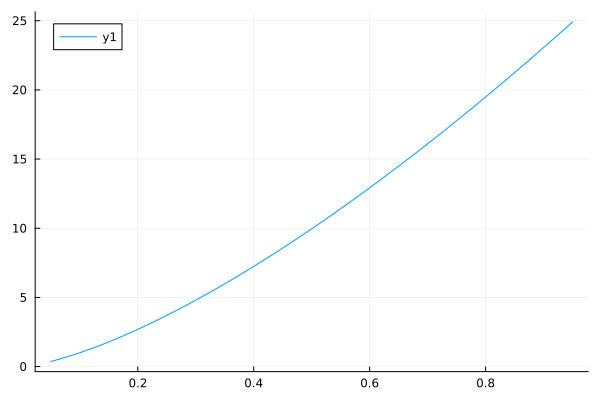

In [93]:
# how does the steady-state depends on saving rate ? 

s_vector = range(0.05, 0.95; length=1000)
ss_vector = [quick_dirty_steady_state(model;s=s) for s in s_vector]

plot(s_vector, ss_vector)


In [103]:
# iterative version

function steady_state(model; k0=1.0, T=1000, s=0.2, τ_η=1e-6)

    for t=1:T
        k1 = f(k0, model;s=s)
        η = abs(k1-k0)
        if η<τ_η
            return k1, t
        end
        k0 = k1
    end


    # kss = 
end

steady_state (generic function with 1 method)

In [104]:
@time steady_state(model)

  0.007030 seconds (9.08 k allocations: 592.906 KiB, 99.62% compilation time)


(2.6917872031057732, 164)

In [132]:
# 🦁
# how do you modify it to implement Steffenson algorithm?
function steady_state_steffenson(model; k0=1.0, T=1000, s=0.2, τ_η=1e-6, K=10, verbose=false)

    # K number of iterations without extrapolation


    for t=1:T

        k1 = f(k0, model;s=s)

        if t>K
            # use extrapolation
            k2 = f(k1, model;s=s)
            kn = k0 - (k1-k0)^2/(k2 - 2*k1 + k0)
        else
            kn = k1
        end
        η = abs(kn-k0)

        if verbose
            println("Iteration: ", t, " : ",  k0, " : ", kn , " : η = ", η)
        end
        if η<τ_η
            return k1, t
        end
        k0 = kn
    end

end

steady_state_steffenson (generic function with 1 method)

In [133]:
steady_state_steffenson(model; verbose=true)

Iteration: 1 : 1.0 : 1.1 : η = 0.10000000000000009
Iteration: 2 : 1.1 : 1.195801151884219 : η = 0.095801151884219
Iteration: 3 : 1.195801151884219 : 1.2872430129191352 : η = 0.09144186103491614
Iteration: 4 : 1.2872430129191352 : 1.3742574618933996 : η = 0.08701444897426436
Iteration: 5 : 1.3742574618933996 : 1.456845771393547 : η = 0.0825883095001474
Iteration: 6 : 1.456845771393547 : 1.5350611815735393 : η = 0.07821541017999234
Iteration: 7 : 1.5350611815735393 : 1.6089955116075123 : η = 0.07393433003397298
Iteration: 8 : 1.6089955116075123 : 1.6787687913320717 : η = 0.06977327972455938
Iteration: 9 : 1.6787687913320717 : 1.7445211874595348 : η = 0.06575239612746309
Iteration: 10 : 1.7445211874595348 : 1.8064066954927231 : η = 0.061885508033188374
Iteration: 11 : 1.8064066954927231 : 2.763707849732011 : η = 0.957301154239288
Iteration: 12 : 2.763707849732011 : 2.692058690737832 : η = 0.07164915899417901
Iteration: 13 : 2.692058690737832 : 2.6918003887220845 : η = 0.000258302015747613

(2.6918003884800683, 14)

In [137]:
@time steady_state_steffenson(model; verbose=false, K=1)

  0.000008 seconds (1 allocation: 32 bytes)


(2.691800385266389, 6)